## Practice

#### Predicting whether the person has heart disease or not based on "age", "sex", "BP", and "cholestrol"

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df= pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [65]:
print("shape",df.shape)

shape (270, 5)


In [6]:
print(df.info())

shape (270, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
age              270 non-null int64
sex              270 non-null int64
BP               270 non-null int64
cholestrol       270 non-null int64
heart disease    270 non-null int64
dtypes: int64(5)
memory usage: 10.6 KB
None


In [3]:
df.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

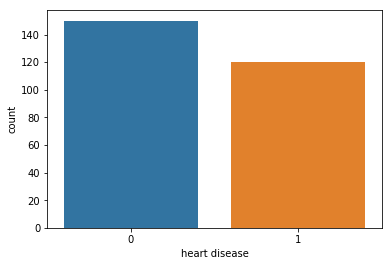

In [66]:
sns.countplot(df['heart disease'])

In [7]:
X=df[['age', 'sex', 'BP', 'cholestrol']]
y= df[["heart disease"]]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# split data into train and testing set
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=21,)

### Decision Tree

## 1

In [10]:
# import dec tree model and fit 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
# predict train and test
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [12]:
def evaluation(actual, pred):
    print(confusion_matrix(actual, pred))
    print("accuracy_score",accuracy_score(actual, pred))
    print("recall_score",recall_score(actual, pred))
    print("precision_score",precision_score(actual, pred))

In [13]:
# calculate training accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
evaluation(y_train,y_train_pred)

[[118   5]
 [ 57  36]]
accuracy_score 0.7129629629629629
recall_score 0.3870967741935484
precision_score 0.8780487804878049


In [14]:
# calculate testing accuracy
evaluation(y_test,y_test_pred)

[[22  5]
 [20  7]]
accuracy_score 0.5370370370370371
recall_score 0.25925925925925924
precision_score 0.5833333333333334


##### Training accuracy is 71% and testing accuracy is 53%

# HyperParametric tunning

## Model: 2

[[117   6]
 [ 56  37]]
accuracy_score 0.7129629629629629
recall_score 0.3978494623655914
precision_score 0.8604651162790697
[[22  5]
 [20  7]]
accuracy_score 0.5370370370370371
recall_score 0.25925925925925924
precision_score 0.5833333333333334

criterion: gini max_features: None max_depth: 3 min_samples_split: 10 min_samples_leaf: 5


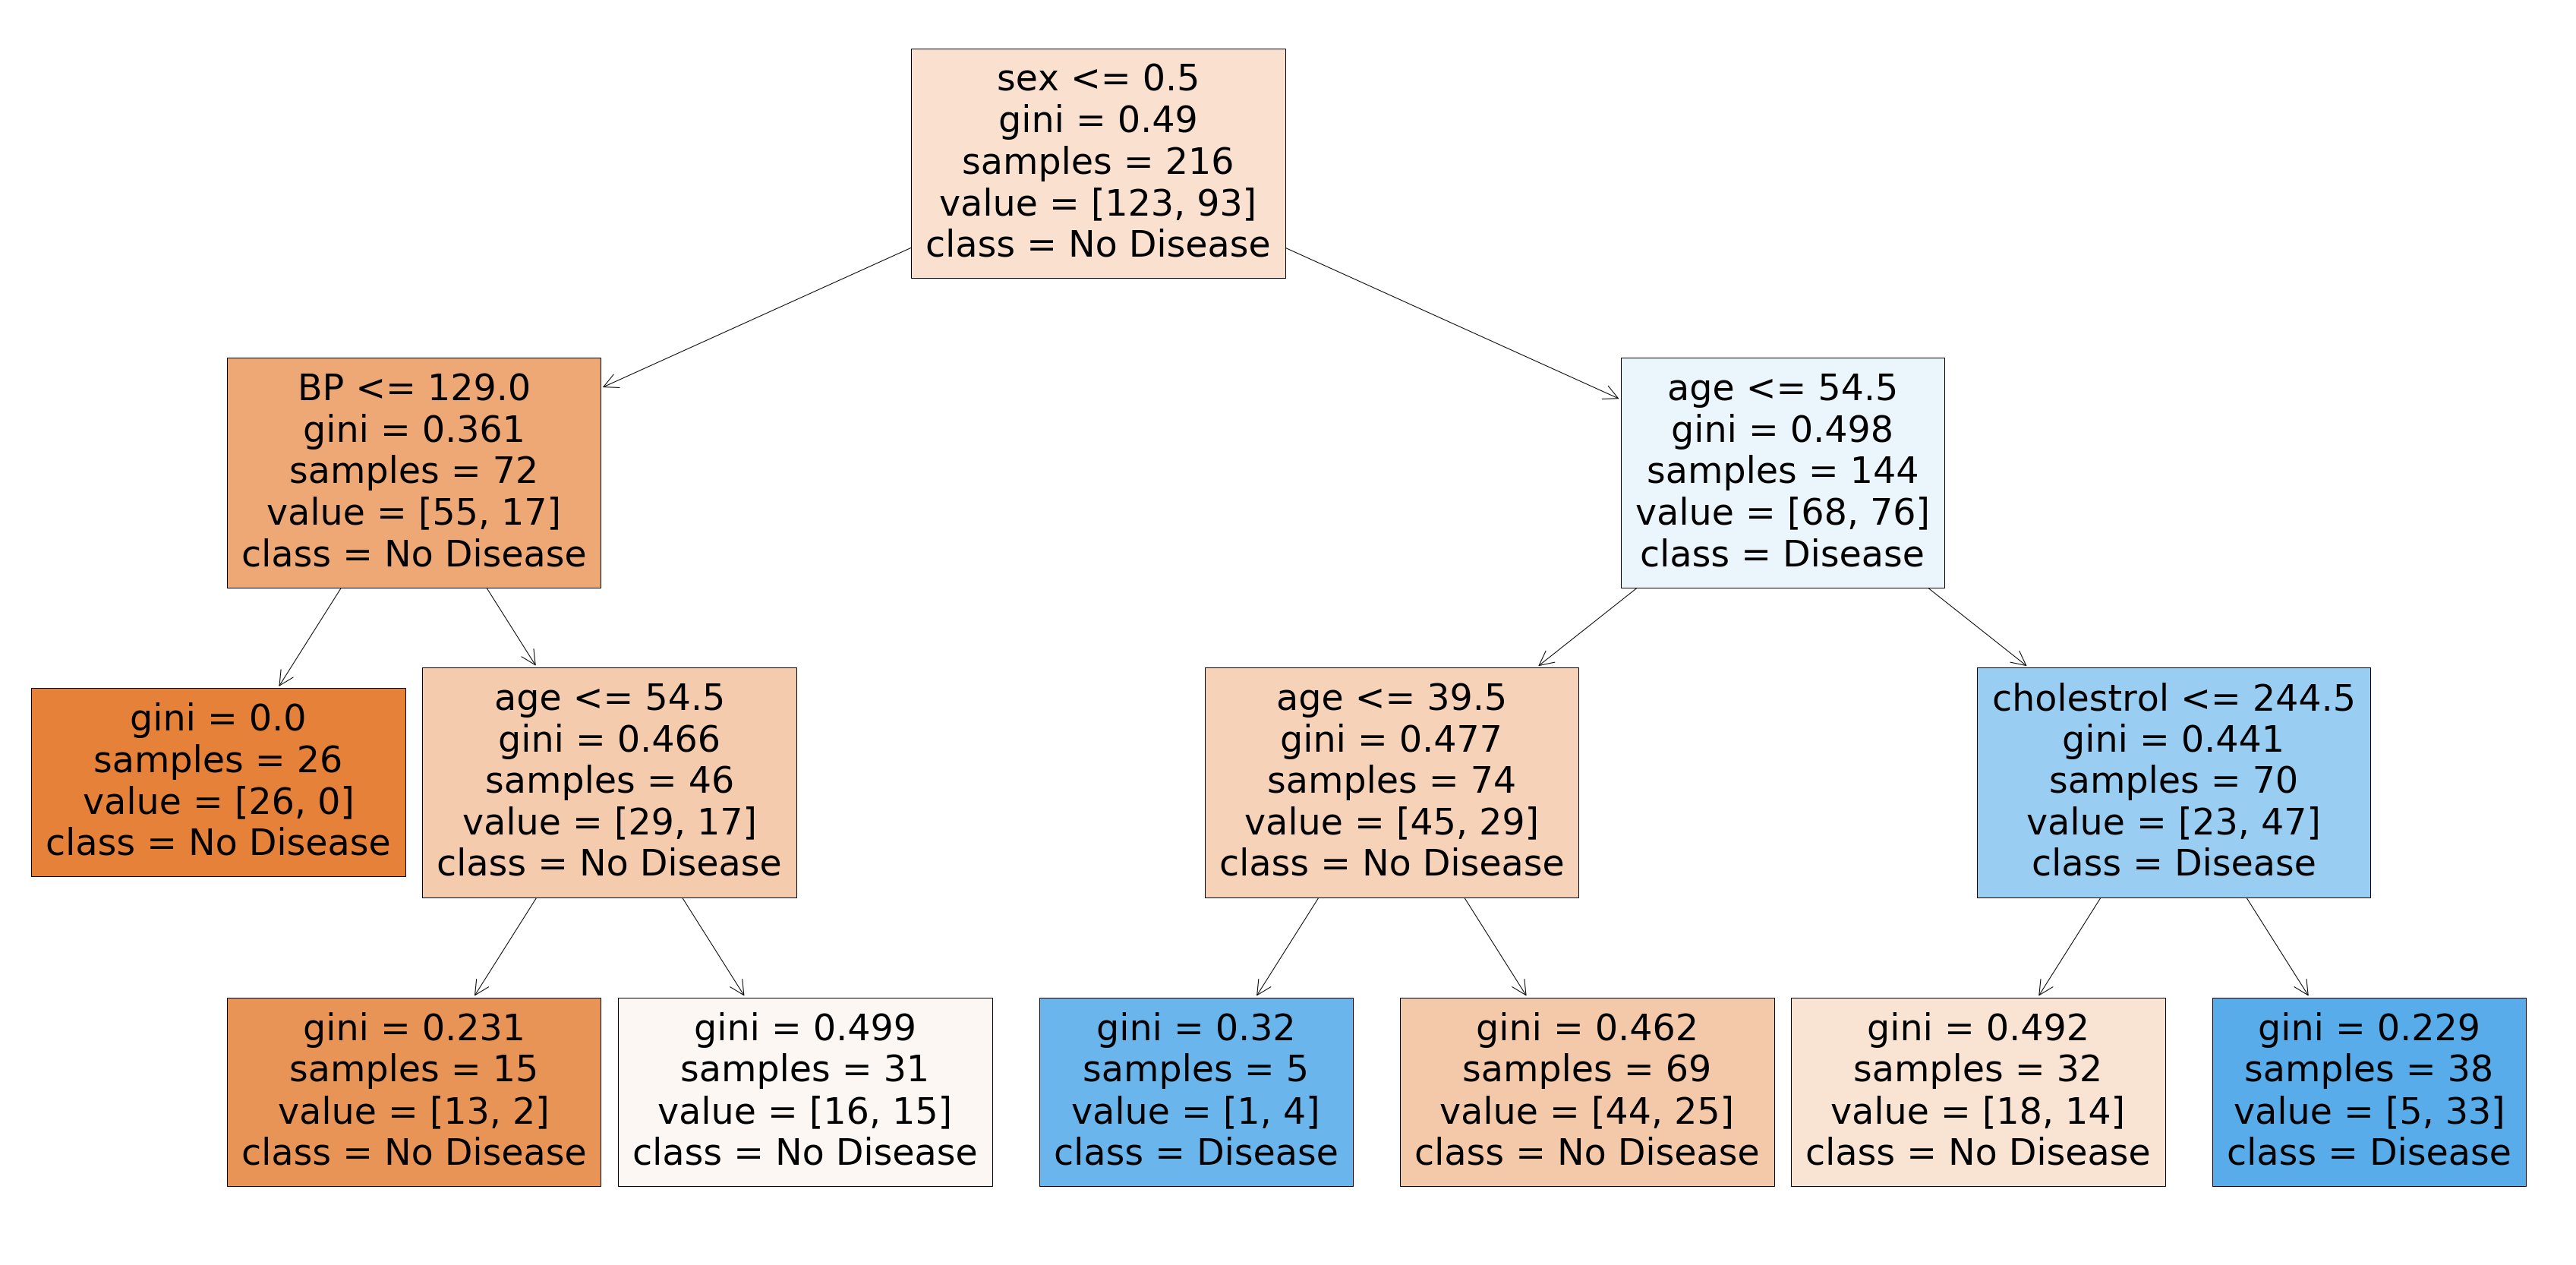

In [16]:
# import dec tree model and fit 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3,min_samples_split=10,min_samples_leaf=5)
dt.fit(X_train, y_train)

# predict train and test
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# calculate testing accuracy
evaluation(y_train,y_train_pred)
evaluation(y_test,y_test_pred)

# Building Tree
print()
print("criterion:",dt.criterion,"max_features:",dt.max_features,"max_depth:", dt.max_depth,"min_samples_split:",dt.min_samples_split,"min_samples_leaf:",dt.min_samples_leaf)

from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

##### Training accuracy is 71% and testing accuracy is 53%

## Model: 3

[[104  19]
 [ 32  61]]
accuracy_score 0.7638888888888888
recall_score 0.6559139784946236
precision_score 0.7625
[[20  7]
 [15 12]]
accuracy_score 0.5925925925925926
recall_score 0.4444444444444444
precision_score 0.631578947368421

criterion: gini max_features: None max_depth: 4 min_samples_split: 10 min_samples_leaf: 5


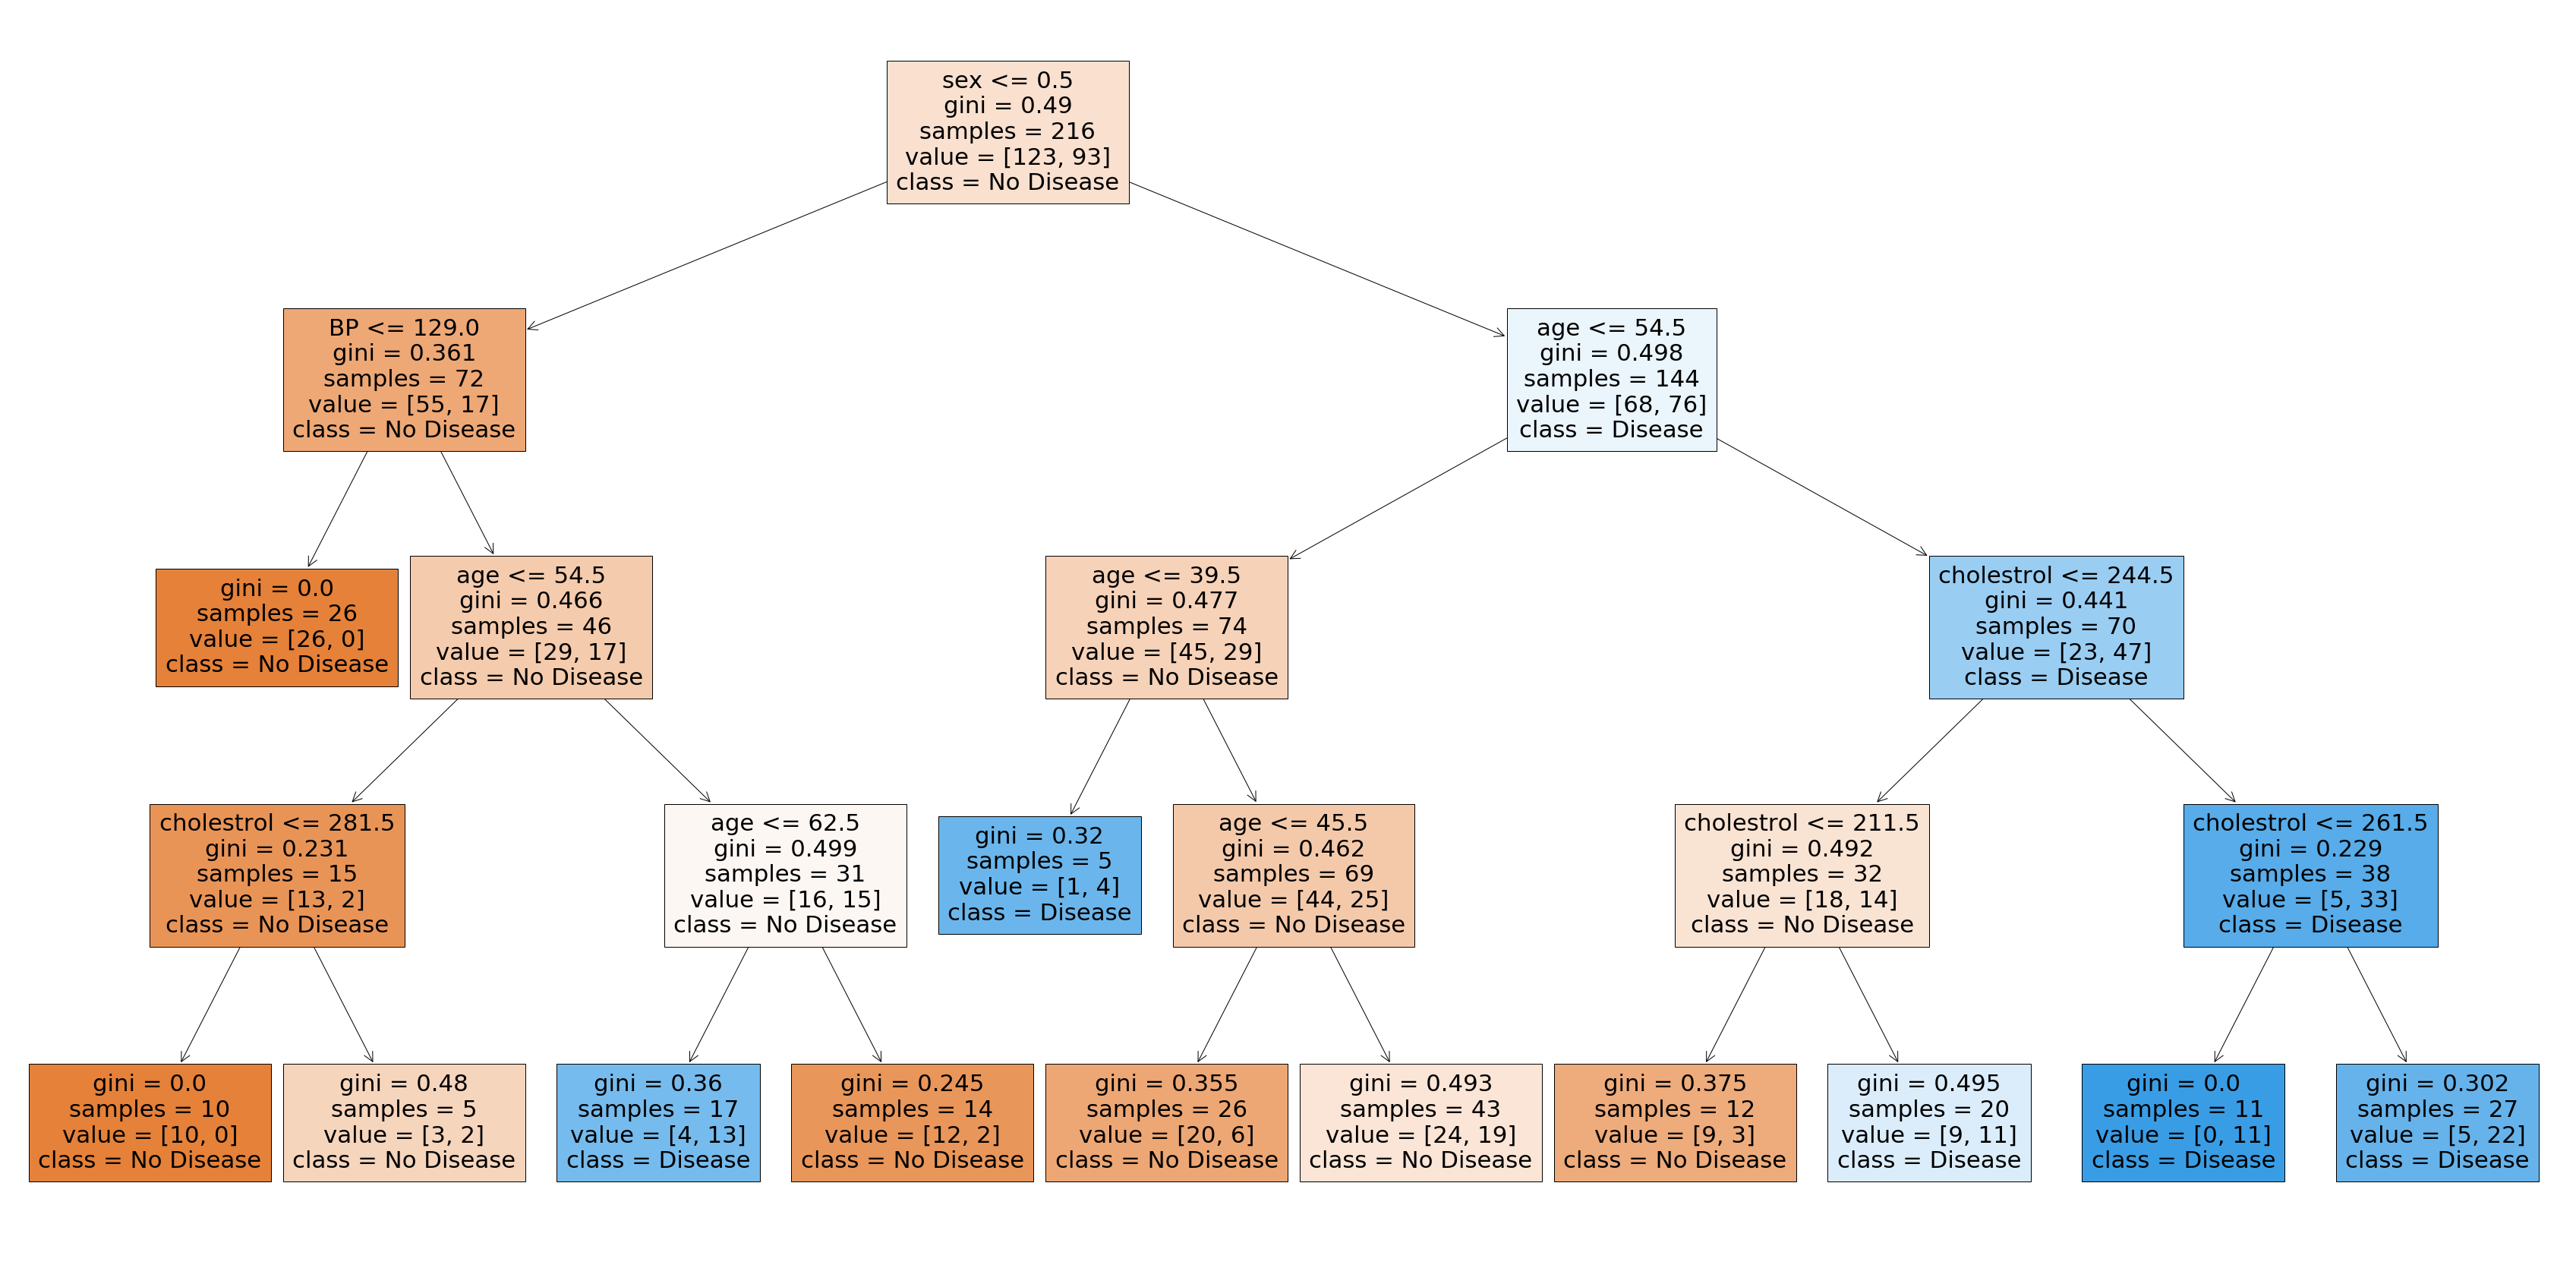

In [17]:
# import dec tree model and fit 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4,min_samples_split=10,min_samples_leaf=5)
dt.fit(X_train, y_train)

# predict train and test
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# calculate testing accuracy
evaluation(y_train,y_train_pred)
evaluation(y_test,y_test_pred)

# Building Tree
print()
print("criterion:",dt.criterion,"max_features:",dt.max_features,"max_depth:", dt.max_depth,"min_samples_split:",dt.min_samples_split,"min_samples_leaf:",dt.min_samples_leaf)

from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

##### Training accuracy is 76% and testing accuracy is 59%

## Model: 4

[[95 28]
 [18 75]]
accuracy_score 0.7870370370370371
recall_score 0.8064516129032258
precision_score 0.7281553398058253
[[18  9]
 [ 9 18]]
accuracy_score 0.6666666666666666
recall_score 0.6666666666666666
precision_score 0.6666666666666666

criterion: gini max_features: None max_depth: 5 min_samples_split: 12 min_samples_leaf: 10


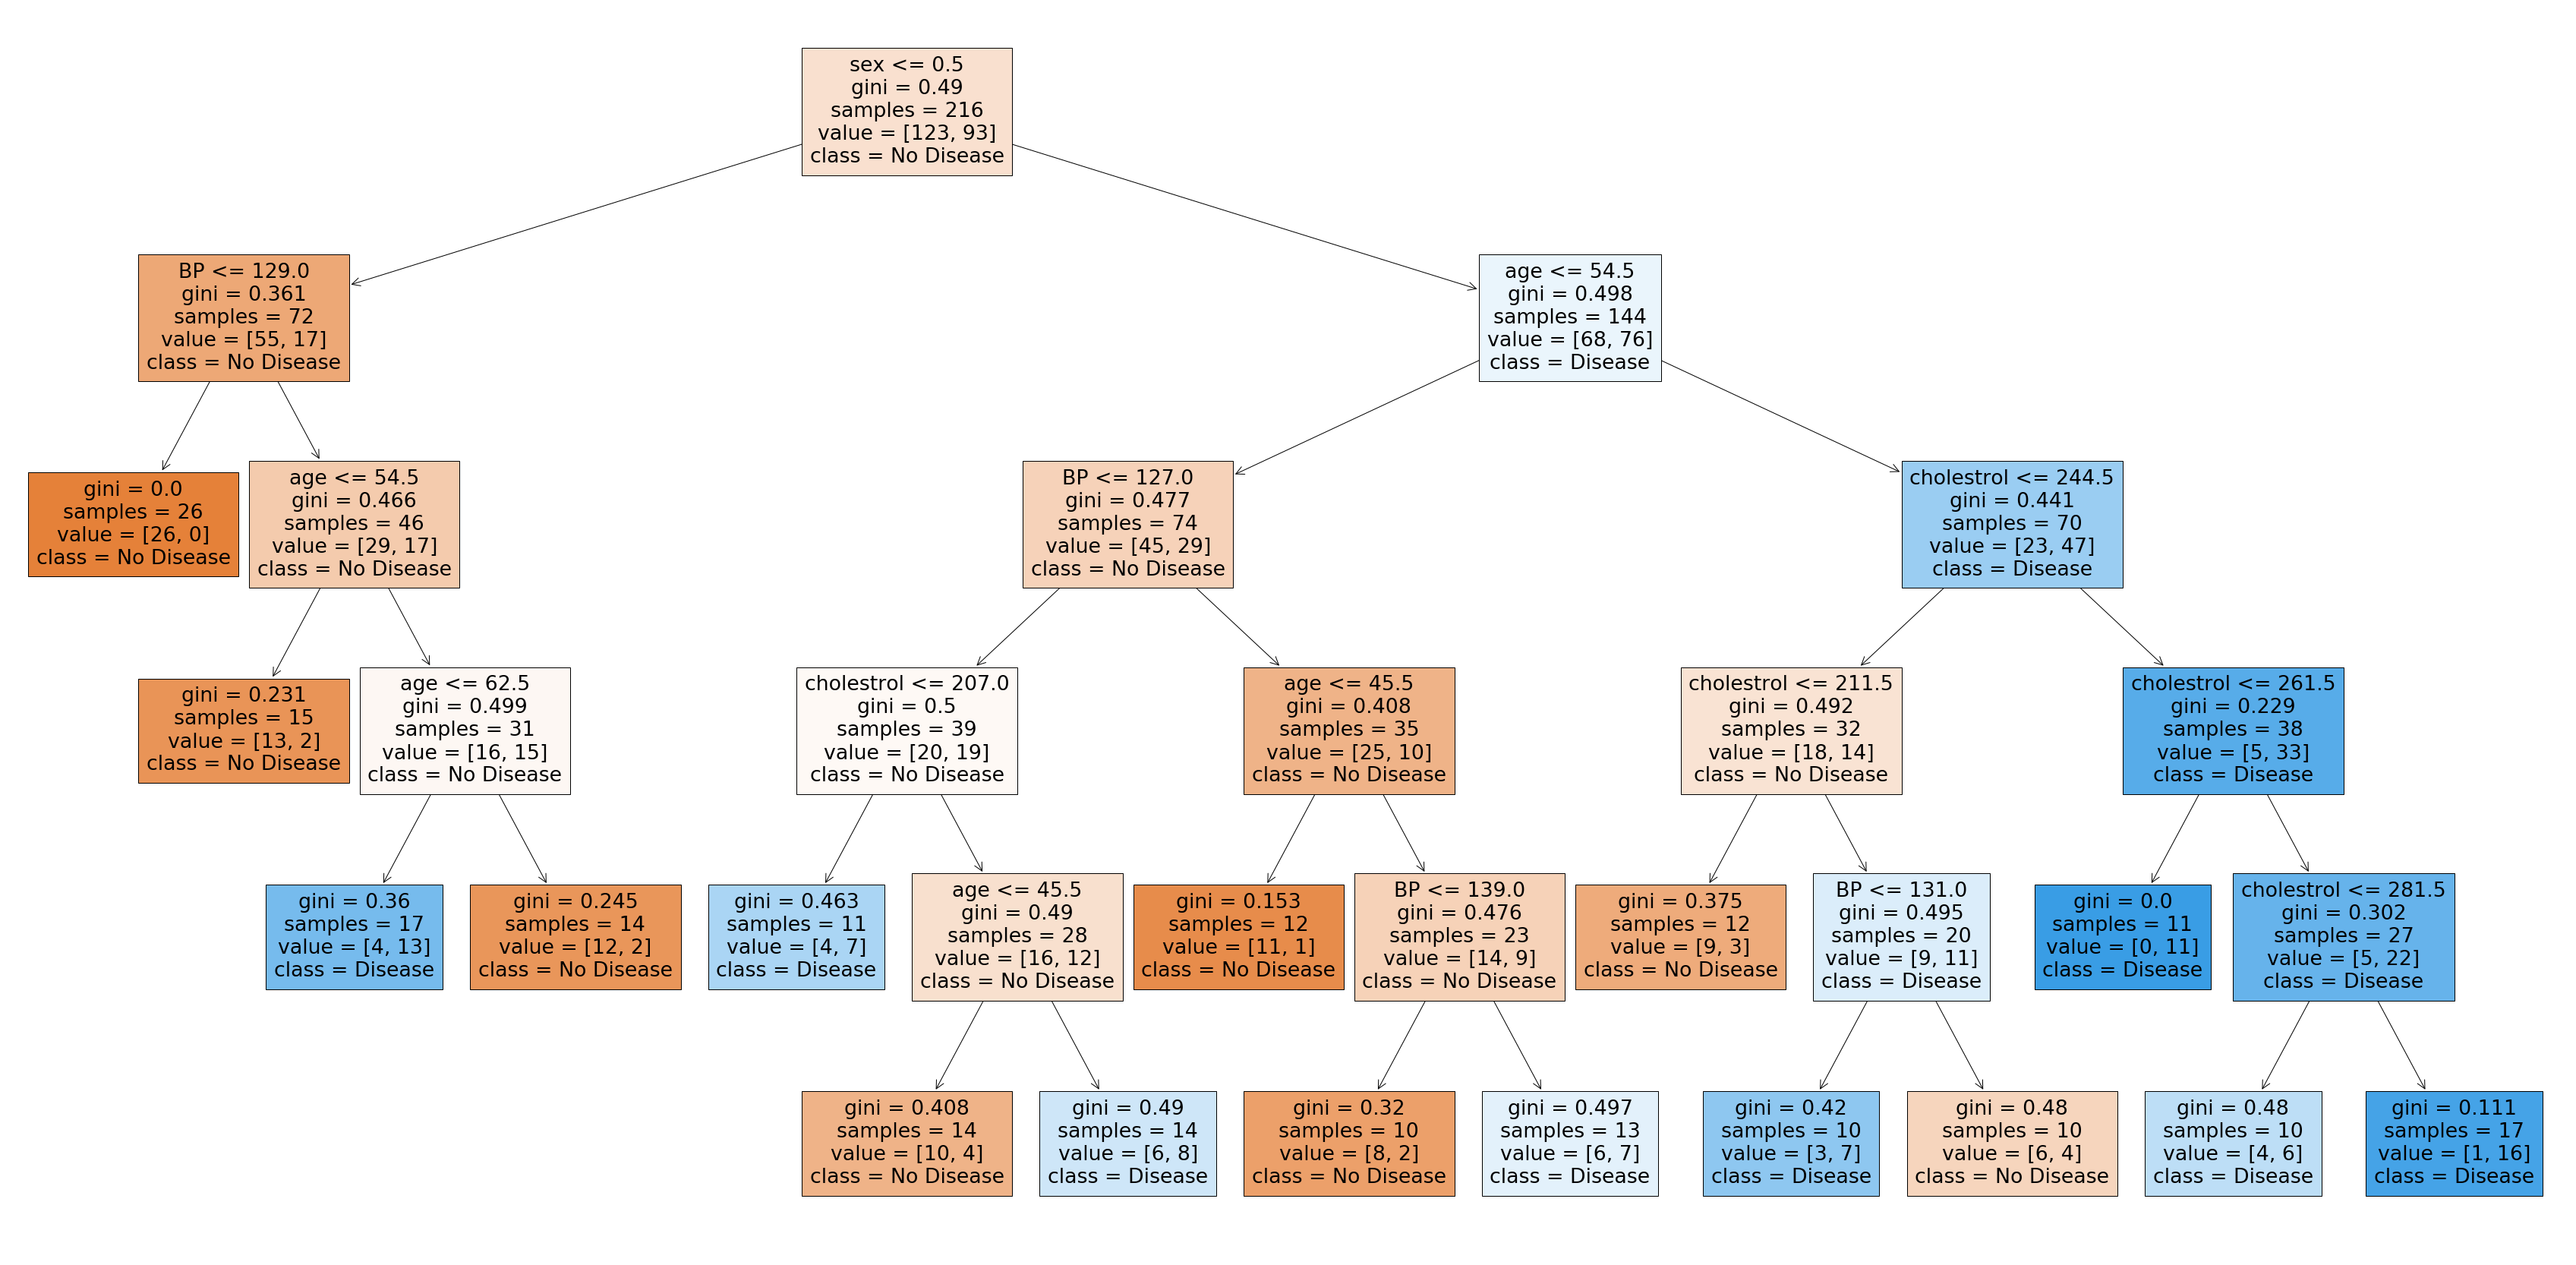

In [18]:
# import dec tree model and fit 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=12,min_samples_leaf=10)
dt.fit(X_train, y_train)

# predict train and test
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# calculate testing accuracy
evaluation(y_train,y_train_pred)
evaluation(y_test,y_test_pred)

# Building Tree
print()
print("criterion:",dt.criterion,"max_features:",dt.max_features,"max_depth:", dt.max_depth,"min_samples_split:",dt.min_samples_split,"min_samples_leaf:",dt.min_samples_leaf)

from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

##### Training accuracy is 78% and testing accuracy is 66%

### Cross validation: 1

In [19]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()

In [57]:
param = {
    "max_depth" : [2,4,5],
    "min_samples_leaf" : [5,10,15,20],
    "min_samples_split" : [5,10,12,15,20,25,30]    
}

In [58]:
grid = GridSearchCV(estimator=dt, 
            param_grid = param,
            cv=4, n_jobs = -1, verbose=1, scoring="accuracy")

In [59]:
%%time
grid.fit(X_train,y_train)

Fitting 4 folds for each of 84 candidates, totalling 336 fits
Wall time: 16 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 12, 15, 20, 25, 30]},
             scoring='accuracy', verbose=1)

In [60]:
result_df = pd.DataFrame(grid.cv_results_)
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011717,0.006765,0.011719,0.006766,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.444444,0.62963,0.592593,0.648148,0.578704,0.080054,72
1,0.003906,0.006765,0.003905,0.006764,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.444444,0.62963,0.592593,0.648148,0.578704,0.080054,72
2,0.011715,0.006764,0.000000,0.000000,2,5,12,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.444444,0.62963,0.592593,0.648148,0.578704,0.080054,72
3,0.007811,0.007811,0.003907,0.006768,2,5,15,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.444444,0.62963,0.592593,0.648148,0.578704,0.080054,72
4,0.007809,0.007809,0.000000,0.000000,2,5,20,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.444444,0.62963,0.592593,0.648148,0.578704,0.080054,72


In [61]:
result_df.sort_values(by="mean_test_score",ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
83,0.007810,0.007810,0.003905,0.006764,5,20,30,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.592593,0.62963,0.666667,0.648148,0.634259,0.027389,1
51,0.011715,0.012951,0.000000,0.000000,4,20,12,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.592593,0.62963,0.666667,0.648148,0.634259,0.027389,1
53,0.003905,0.006764,0.003911,0.006774,4,20,20,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.592593,0.62963,0.666667,0.648148,0.634259,0.027389,1
54,0.011710,0.012950,0.003906,0.006765,4,20,25,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.592593,0.62963,0.666667,0.648148,0.634259,0.027389,1
55,0.007811,0.007811,0.007811,0.013529,4,20,30,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.592593,0.62963,0.666667,0.648148,0.634259,0.027389,1


In [62]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=5)

In [63]:
def evaluate_model(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("recall_score",recall_score(y_train, model.predict(X_train)))
    print("precision_score",precision_score(y_train, model.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*10)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("recall_score",recall_score(y_test, model.predict(X_test)))
    print("precision_score",precision_score(y_test, model.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

In [64]:
evaluate_model(grid.best_estimator_)

Train Accuracy : 0.6990740740740741
recall_score 0.3548387096774194
precision_score 0.868421052631579
Train Confusion Matrix:
[[118   5]
 [ 60  33]]
----------
Test Accuracy : 0.5925925925925926
recall_score 0.25925925925925924
precision_score 0.7777777777777778
Test Confusion Matrix:
[[25  2]
 [20  7]]


##### Training accuracy is 70% and testing accuracy is 59%

### Cross validation: 2

In [40]:
# Defining parameters
param = {
    "max_depth" : [4,5,6],
    "min_samples_leaf" : [8,10],
    "min_samples_split" : [20,25,30,35]    
}

# cross validation with k groups
grid = GridSearchCV(estimator=dt, 
            param_grid = param,
            cv=4, n_jobs = -1, verbose=1, scoring="accuracy")

In [41]:
%%time
grid.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Wall time: 17.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [8, 10],
                         'min_samples_split': [20, 25, 30, 35]},
             scoring='accuracy', verbose=1)

In [42]:
print("best parameters are: ",grid.best_estimator_)

best parameters are:  DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=35)


In [43]:
evaluate_model(grid.best_estimator_)

Train Accuracy : 0.7129629629629629
recall_score 0.43010752688172044
precision_score 0.8163265306122449
Train Confusion Matrix:
[[114   9]
 [ 53  40]]
----------
Test Accuracy : 0.6111111111111112
recall_score 0.3333333333333333
precision_score 0.75
Test Confusion Matrix:
[[24  3]
 [18  9]]


#####  Training accuracy is 71% and testing accuracy is 61%

### Cross validation: 3

In [52]:
# Defining parameters
param = {
    "max_depth" : [2,3,4],
    "min_samples_leaf" : [5,6,7],
    "min_samples_split" : [20,25,30,35]
}

# cross validation with k groups
grid = GridSearchCV(estimator=dt, 
            param_grid = param,
            cv=4, n_jobs = -1, verbose=1, scoring="accuracy")

In [53]:
%%time
grid.fit(X_train,y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Wall time: 13.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [20, 25, 30, 35]},
             scoring='accuracy', verbose=1)

In [54]:
print("best parameters are: ",grid.best_estimator_)

best parameters are:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=35)


In [55]:
evaluate_model(grid.best_estimator_)

Train Accuracy : 0.7129629629629629
recall_score 0.40860215053763443
precision_score 0.8444444444444444
Train Confusion Matrix:
[[116   7]
 [ 55  38]]
----------
Test Accuracy : 0.5555555555555556
recall_score 0.2962962962962963
precision_score 0.6153846153846154
Test Confusion Matrix:
[[22  5]
 [19  8]]


##### Training accuracy is 71% and testing accuracy is 55%

### Conclusion :<br>
    cross-validation with hyper_parameters [max_depth=4, min_samples_leaf=10, min_samples_split=35] gives the highest accuracy which is 71% accuracy for the training data set and 61% accuracy for the testing data set.

    But the recall score is very low for both the training and testing data sets, to increase the recall score more training data is required and more combinations of hyperparameters need to try.